In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('HeatingOil-Training.csv')
dataset.sample(5)

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
1121,3,86,136,4,23.9,2
132,8,56,300,2,66.7,8
966,3,77,132,2,21.3,4
1192,10,58,273,1,59.4,5
957,5,89,185,5,44.4,5


In [5]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,[-1]].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
X_train.shape

(913, 2)

In [8]:
y_train.shape

(913, 1)

In [9]:
X_test.shape

(305, 2)

In [10]:
y_test.shape

(305, 1)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([3, 3, 3, 7, 3, 2, 2, 3, 7, 3, 7, 7, 2, 3, 7, 7, 7, 3, 4, 3, 7, 6,
       4, 7, 7, 7, 1, 6, 2, 4, 3, 7, 7, 3, 7, 3, 3, 2, 7, 3, 7, 3, 3, 7,
       7, 2, 7, 3, 4, 4, 7, 7, 7, 7, 4, 1, 3, 3, 7, 3, 3, 7, 4, 3, 4, 7,
       7, 7, 2, 7, 7, 7, 4, 7, 7, 7, 3, 7, 3, 7, 7, 4, 3, 3, 7, 7, 3, 4,
       7, 7, 3, 3, 7, 7, 7, 7, 7, 7, 4, 7, 7, 3, 3, 7, 3, 4, 4, 3, 7, 3,
       7, 7, 3, 7, 2, 7, 3, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 1, 7, 2, 3, 3,
       3, 3, 3, 7, 7, 3, 7, 6, 2, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 4, 7, 1,
       7, 4, 7, 7, 7, 4, 7, 3, 7, 3, 7, 7, 7, 2, 7, 4, 6, 7, 4, 3, 7, 7,
       7, 7, 7, 4, 2, 7, 7, 7, 4, 4, 7, 7, 3, 7, 4, 3, 7, 3, 7, 1, 7, 3,
       7, 4, 4, 7, 3, 3, 7, 3, 7, 7, 3, 3, 3, 4, 7, 1, 2, 3, 3, 7, 7, 7,
       7, 4, 2, 4, 7, 2, 3, 2, 3, 2, 7, 3, 7, 3, 3, 3, 7, 4, 4, 3, 7, 4,
       7, 4, 7, 4, 4, 7, 7, 2, 7, 4, 3, 7, 7, 7, 7, 7, 7, 4, 3, 3, 2, 7,
       7, 7, 3, 7, 7, 3, 4, 7, 4, 7, 7, 2, 7, 7, 2, 2, 3, 7, 7, 4, 3, 7,
       7, 7, 4, 7, 7, 4, 7, 7, 3, 7, 7, 3, 7, 3, 2,

In [15]:
y_actual = y_test.flatten()
y_actual

array([8, 4, 4, 8, 1, 1, 2, 3, 7, 8, 6, 7, 4, 4, 5, 3, 3, 2, 8, 2, 1, 5,
       2, 4, 3, 1, 1, 5, 3, 5, 8, 7, 1, 2, 5, 1, 1, 8, 6, 4, 7, 6, 1, 7,
       2, 2, 8, 1, 6, 8, 3, 6, 7, 8, 8, 5, 4, 1, 8, 4, 4, 4, 3, 4, 6, 8,
       4, 5, 7, 6, 3, 8, 8, 1, 7, 7, 3, 1, 2, 6, 2, 3, 2, 2, 6, 4, 4, 4,
       3, 8, 5, 2, 8, 8, 3, 3, 1, 5, 3, 1, 8, 4, 3, 6, 1, 5, 5, 6, 5, 4,
       4, 8, 1, 1, 8, 6, 2, 5, 5, 3, 7, 1, 5, 3, 6, 2, 1, 3, 8, 1, 8, 2,
       7, 5, 3, 1, 6, 3, 5, 8, 4, 5, 7, 4, 8, 8, 5, 5, 7, 4, 1, 5, 8, 4,
       7, 4, 6, 8, 1, 1, 4, 2, 6, 4, 3, 2, 2, 8, 6, 8, 8, 6, 4, 3, 6, 8,
       6, 6, 5, 7, 4, 7, 2, 7, 6, 6, 6, 8, 1, 3, 7, 3, 1, 4, 2, 2, 7, 5,
       5, 2, 4, 7, 1, 2, 2, 4, 7, 3, 7, 8, 2, 2, 7, 6, 2, 4, 4, 8, 4, 2,
       7, 7, 3, 8, 8, 8, 2, 2, 1, 7, 8, 3, 8, 2, 4, 1, 6, 6, 3, 4, 6, 4,
       2, 8, 1, 8, 2, 8, 8, 3, 7, 7, 6, 8, 2, 1, 1, 5, 4, 4, 3, 1, 7, 6,
       6, 4, 3, 8, 1, 1, 4, 4, 6, 8, 1, 1, 6, 7, 2, 1, 3, 6, 8, 8, 1, 6,
       7, 8, 5, 4, 8, 5, 4, 1, 6, 7, 8, 1, 5, 7, 1,

In [16]:
for i in range(len(y_actual)):
    print(f'Hasil aktual: {y_actual[i]} hasil prediksi: {y_pred[i]}')

Hasil aktual: 8 hasil prediksi: 3
Hasil aktual: 4 hasil prediksi: 3
Hasil aktual: 4 hasil prediksi: 3
Hasil aktual: 8 hasil prediksi: 7
Hasil aktual: 1 hasil prediksi: 3
Hasil aktual: 1 hasil prediksi: 2
Hasil aktual: 2 hasil prediksi: 2
Hasil aktual: 3 hasil prediksi: 3
Hasil aktual: 7 hasil prediksi: 7
Hasil aktual: 8 hasil prediksi: 3
Hasil aktual: 6 hasil prediksi: 7
Hasil aktual: 7 hasil prediksi: 7
Hasil aktual: 4 hasil prediksi: 2
Hasil aktual: 4 hasil prediksi: 3
Hasil aktual: 5 hasil prediksi: 7
Hasil aktual: 3 hasil prediksi: 7
Hasil aktual: 3 hasil prediksi: 7
Hasil aktual: 2 hasil prediksi: 3
Hasil aktual: 8 hasil prediksi: 4
Hasil aktual: 2 hasil prediksi: 3
Hasil aktual: 1 hasil prediksi: 7
Hasil aktual: 5 hasil prediksi: 6
Hasil aktual: 2 hasil prediksi: 4
Hasil aktual: 4 hasil prediksi: 7
Hasil aktual: 3 hasil prediksi: 7
Hasil aktual: 1 hasil prediksi: 7
Hasil aktual: 1 hasil prediksi: 1
Hasil aktual: 5 hasil prediksi: 6
Hasil aktual: 3 hasil prediksi: 2
Hasil aktual: 

No handles with labels found to put in legend.


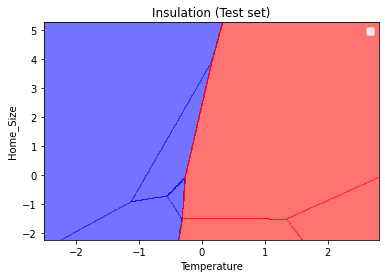

In [17]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.55, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Insulation (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Home_Size')
plt.legend()
plt.show()